In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import time
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima

In [2]:
dfs2 = pd.read_csv('Data/Solar Data/Solar 2.csv')

In [3]:
dfs2

,Unnamed: 0,series_value,datetime,Year,Month,Day_of_Month,Hour,minutes,series_name
0,0,0.00,2019-06-05 14:00:00,2019,6,5,14,0,Solar2
1,4,0.00,2019-06-05 15:00:00,2019,6,5,15,0,Solar2
2,8,0.00,2019-06-05 16:00:00,2019,6,5,16,0,Solar2
3,12,0.00,2019-06-05 17:00:00,2019,6,5,17,0,Solar2
4,16,0.00,2019-06-05 18:00:00,2019,6,5,18,0,Solar2
...,...,...,...,...,...,...,...,...,...
12341,49364,0.00,2020-10-31 19:00:00,2020,10,31,19,0,Solar2
12342,49368,0.39,2020-10-31 20:00:00,2020,10,31,20,0,Solar2
12343,49372,1.20,2020-10-31 21:00:00,2020,10,31,21,0,Solar2
12344,49376,2.24,2020-10-31 22:00:00,2020,10,31,22,0,Solar2


In [6]:
data = dfs2['series_value'][4000:5000]

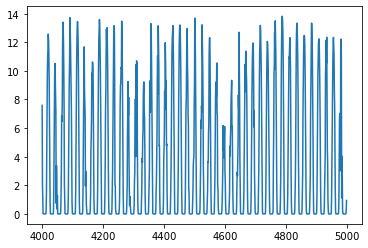

In [7]:
plt.plot(data)

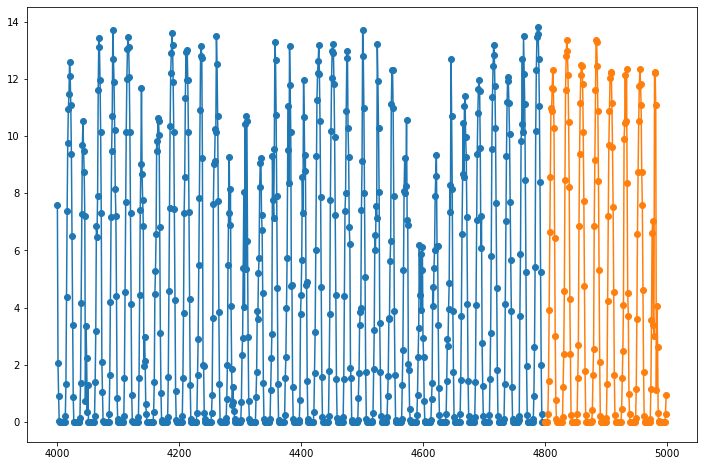

In [8]:
train_size = 0.8

ts = data

split_idx = round(len(data)* train_size)

# Split
train = ts.iloc[:split_idx]
test = ts.iloc[split_idx:]

# Visualize split
fig,ax= plt.subplots(figsize=(12,8))
kws = dict(marker='o')
plt.plot(train, label='Train', **kws)
plt.plot(test, label='Test', **kws)

In [9]:
modelactual = auto_arima(train, start_p=0, start_q=0, seasonal=True)
modelactual.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  800
Model:               SARIMAX(4, 0, 1)   Log Likelihood               -1336.286
Date:                Wed, 28 Sep 2022   AIC                           2686.572
Time:                        18:15:16   BIC                           2719.364
Sample:                             0   HQIC                          2699.170
                                - 800                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1754      0.039      4.479      0.000       0.099       0.252
ar.L1          1.9169      0.053     36.172      0.000       1.813       2.021
ar.L2         -0.7766      0.073    -10.656      0.000      -0.919      -0.634
ar.L3         -0.4465      0.049     -9.096      0.000      -0.543      -0.350
ar.L4          0.2580      0.036      7.157      0.000       0.187       0.329
ma.L1         -0.8756      0.041    -21.302      0.000      -0.956      -0.795
sigma2         1.6460      0.061     26.915      0.000       1.526       1.766
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               393.56
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                             0.31
Prob(H) (two-sided):                  0.35   Kurtosis:                         6.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [11]:
data = train
# define model
my_order = (4, 1, 1)
my_seasonal_order = (4, 1, 1, 24)
model = SARIMAX(data, order=my_order, seasonal_order=my_seasonal_order)
# fit model
model_fit = model.fit()
# one step forecast
yhat = model_fit.predict(end=len(test))

C:\Users\sohan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [12]:
yhat

4000    0.000000
4001    7.589998
4002    2.050004
4003    0.909998
4004    0.030001
          ...   
4196   -0.324556
4197   -0.123928
4198    0.075829
4199    0.098117
4200    0.097356
Name: predicted_mean, Length: 201, dtype: float64

In [39]:
lst = []
for i in range(4008, 4201):
    lst.append(yhat[i])

In [40]:
forecastdf = pd.DataFrame(lst, columns=['forecast']) 

In [32]:
test

4800    0.00
4801    0.00
4802    0.00
4803    0.00
4804    0.00
        ... 
4995    0.00
4996    0.00
4997    0.00
4998    0.28
4999    0.94
Name: series_value, Length: 200, dtype: float64

In [42]:
lst = []
for i in range(4800, 4992):
    lst.append(test[i])

In [43]:
testdfnew = pd.DataFrame(lst, columns=['test']) 

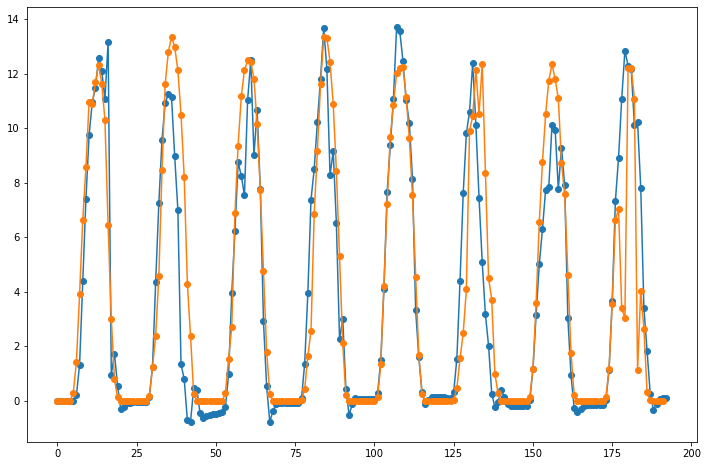

In [44]:
fig,ax= plt.subplots(figsize=(12,8))
kws = dict(marker='o')
plt.plot(forecastdf['forecast'], label='Forecast', **kws)
plt.plot(testdfnew['test'], label='Test', **kws)#

In [45]:
from sklearn.metrics import mean_absolute_error
import numpy as np

def mean_absolute_scaled_error(y_true, y_pred, y_train):
    e_t = y_true - y_pred
    scale = mean_absolute_error(y_train[1:], y_train[:-1])
    return np.mean(np.abs(e_t / scale))


pred = forecastdf['forecast'] 
tst = testdfnew['test']
trn = train

mean_absolute_scaled_error(pred,tst,trn)

1.09189416147396